In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf

In [8]:
images = []
ages = []
genders = []

for i in os.listdir('UTKFace/crop_part1/')[0:8000]:
    split = i.split('_')
    ages.append(int(split[0]))
    genders.append(int(split[1]))
    images.append(Image.open('UTKFace/crop_part1/' + i))

In [9]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')
genders = pd.Series(list(genders), name = 'Genders')

df = pd.concat([images, ages, genders], axis=1)
df

,Images,Ages,Genders
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,9,1
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1,1
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,16,0
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1,1
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,26,1
...,...,...,...
7995,<PIL.JpegImagePlugin.JpegImageFile image mode=...,48,0
7996,<PIL.JpegImagePlugin.JpegImageFile image mode=...,65,0
7997,<PIL.JpegImagePlugin.JpegImageFile image mode=...,5,1
7998,<PIL.JpegImagePlugin.JpegImageFile image mode=...,35,0


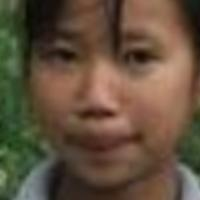

9 1


In [10]:
display(df['Images'][0])
print(df['Ages'][0], df['Genders'][0])

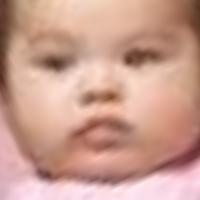

1 1


In [21]:
display(df['Images'][1])
print(df['Ages'][1], df['Genders'][1])

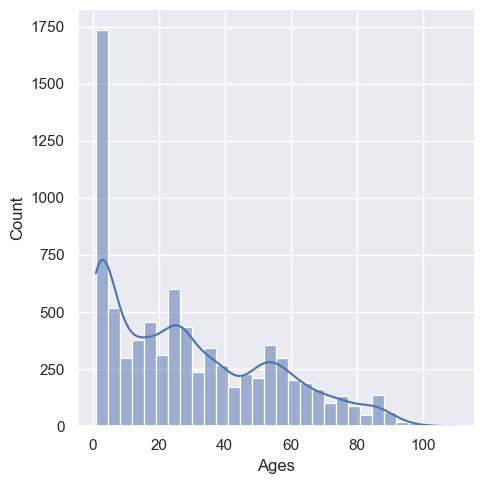

In [23]:
sns.set_theme()
sns.displot(df['Ages'], kde=True, bins=30)

In [24]:
under4s = []

for i in range(len(df)):
    if df['Ages'].iloc[i] <= 4:
        under4s.append(df.iloc[i])
under4s = pd.DataFrame(under4s)
under4s = under4s.sample(frac=0.3)

df = df[df['Ages'] > 4]

df = pd.concat([df, under4s], ignore_index = True)

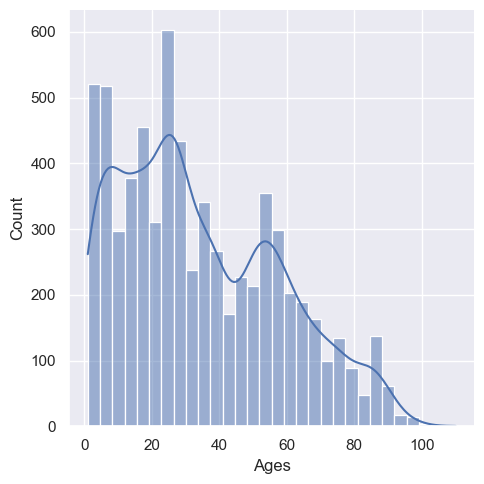

In [26]:
sns.displot(df['Ages'], kde=True, bins=30)

In [27]:
df = df[df['Ages'] < 80]

In [ ]:
sns.displot(df['Ages'],kde=True, bins=20)